In [1]:
import os
os.chdir('../')
import os.path as op
import pickle

import mne
import numpy as np

from scripts.config import meg_dir, rst_dir, subjects_dir
%matplotlib inline

In [2]:
# NOTE: change the name to the intended cluster result
clu_fname = op.join(rst_dir, 'left_auditory_vs_visual_0_to_None.cluster')

# prepare spatial connectivity
fsaverage_src = mne.read_source_spaces(
    op.join(subjects_dir, 'fsaverage', 'bem', 'fsaverage-5-src.fif'))
fsaverage_vertices = [s['vertno'] for s in fsaverage_src]

# get info
info_data = mne.read_source_estimate(
    op.join(meg_dir, 'sample_audvis-dSPM_inverse_morph-filt-sss-aud_left_eq'))
tstep = info_data.tstep

with open(clu_fname, 'rb') as f:
    cluster_result = pickle.load(f)

good_cluster_inds = np.where(cluster_result['cluster_p_values'] < 0.05)

os.environ["SUBJECTS_DIR"] = subjects_dir
stc_all_cluster_vis = mne.stats.summarize_clusters_stc(
    cluster_result['clu'],
    tstep=tstep,
    vertices=fsaverage_vertices,
    subject='fsaverage')

Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read


Using control points [  0.           0.         283.04321864]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from /home/yuhan/Project/from-zero-to-source-estimates/subjects/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
    10 smooth iterations done.


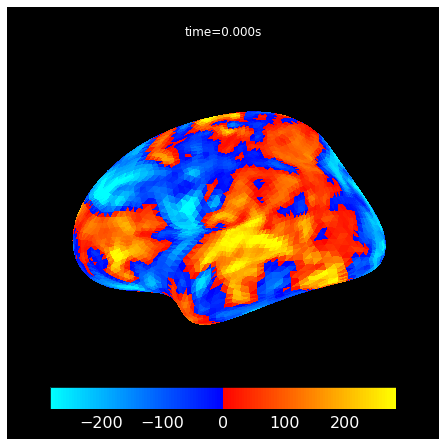

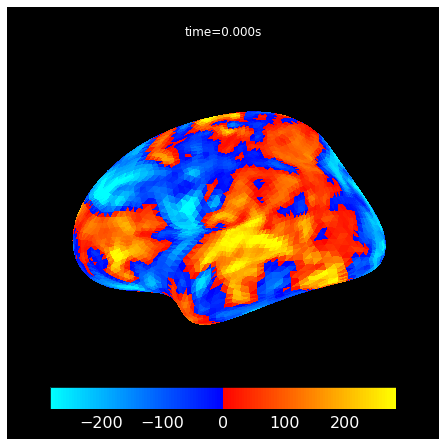

In [3]:
# it's unrealistic but beautiful ?!
stc_all_cluster_vis.plot(hemi='lh', backend='matplotlib')